## Tarea 2
###### Pedro Tapia

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust
%matplotlib inline

In [118]:
tabla = pd.read_csv("https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto1/Covid-19.csv?raw=true", sep=',')

In [119]:
casosRM=tabla[tabla["Region"]=="Metropolitana"]   
casosRM.drop("Tasa",axis=1,inplace=True)

C:\Users\pedro\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [120]:
casos=casosRM.melt(id_vars=["Region","Codigo region","Comuna","Codigo comuna","Poblacion"],var_name="fecha") 

In [121]:
casos.head(2)

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,fecha,value
0,Metropolitana,13,Alhue,13502.0,7405.0,2020-03-30,0.0
1,Metropolitana,13,Buin,13402.0,109641.0,2020-03-30,7.0


In [122]:
casos.drop("Codigo region",axis=1,inplace=True) 
casos.drop("Codigo comuna",axis=1,inplace=True)
casos.drop("Poblacion",axis=1,inplace=True) 

In [123]:
casos.head(2)

,Region,Comuna,fecha,value
0,Metropolitana,Alhue,2020-03-30,0.0
1,Metropolitana,Buin,2020-03-30,7.0


In [124]:
casos["fecha"]=pd.to_datetime(casos["fecha"])  
sumadecasos=casos.groupby("Comuna").resample("W-Mon",on="fecha").sum().reset_index().sort_values(by="fecha")
sumadecasos.head(2)

,Comuna,fecha,value
0,Alhue,2020-03-30,0.0
267,Cerrillos,2020-03-30,0.0


In [125]:
casoslascondes=sumadecasos[sumadecasos["Comuna"]=="Las Condes"] 
casoslascondes.head(2)

,Comuna,fecha,value
1869,Las Condes,2020-03-30,181.0
1870,Las Condes,2020-04-06,690.0


In [126]:
casoslascondes["casos_activos"]=casoslascondes["value"]-casoslascondes["value"].shift()

<ipython-input-126-affd6e163066>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casoslascondes["casos_activos"]=casoslascondes["value"]-casoslascondes["value"].shift()


In [127]:
dat=casoslascondes[casoslascondes["casos_activos"]>0].reset_index()
dat.head(2)

,index,Comuna,fecha,value,casos_activos
0,1870,Las Condes,2020-04-06,690.0,509.0
1,1871,Las Condes,2020-04-13,843.0,153.0


In [128]:
dat.drop("index",axis=1,inplace=True)
dat.drop("value",axis=1,inplace=True)

<AxesSubplot:xlabel='fecha', ylabel='casos_activos'>

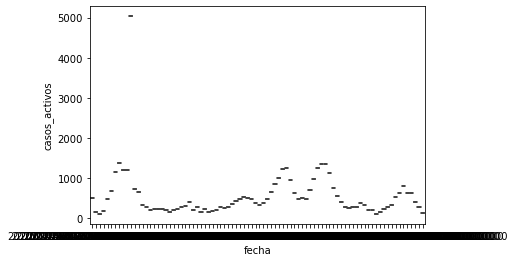

In [129]:
sns.boxplot(x="fecha", y="casos_activos",data=dat)

In [130]:
outlier=casoslascondes[casoslascondes["casos_activos"]>3000]

In [131]:
outlier

,Comuna,fecha,value,casos_activos
1882,Las Condes,2020-06-29,9225.0,5033.0
